<a href="https://colab.research.google.com/github/Pushpraj98/Titanic-model/blob/main/Pushpraj_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Use Titanic dataset predict servive rate *and* accuracy of model**
1. Import dataset
2. Cleaning data
3. Feature scaling
4. Apply svm, logistic regression, Rendom Forest and KNN model
5. Conclusion 


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

link for the dataset
https://drive.google.com/file/d/1sYTfi4FJ82v9DXRUC_qCsGJMFA5-1haZ/view?usp=sharing

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_files/Titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(columns=['Name','PassengerId','Cabin'],axis=1,inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### visulization of data in histogram on different columns

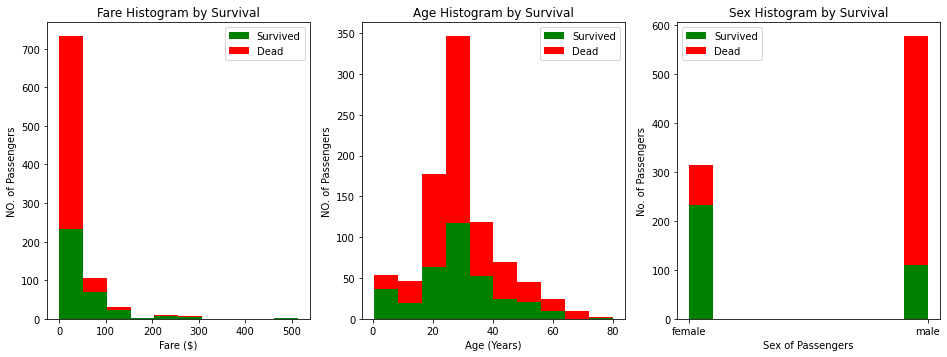

In [ ]:
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('NO. of Passengers')
plt.legend()

plt.subplot(232)
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('NO. of Passengers')
plt.legend()

plt.subplot(233)
plt.hist(x = [df[df['Survived']==1]['Sex'], df[df['Survived']==0]['Sex']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Sex Histogram by Survival')
plt.xlabel('Sex of Passengers')
plt.ylabel('No. of Passengers')
plt.legend()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### convert data type by using Lable Encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
#df['Name']= label_encoder.fit_transform(df['Name'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Ticket']= label_encoder.fit_transform(df['Ticket'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])

In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


### use holdout method for find accuracy of Model

In [ ]:
x=df.iloc[:,0:-1] 
y=df.iloc[:,-1]


In [ ]:
#Import SVM model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=46)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM Accuracy:","{:.2f}".format(metrics.accuracy_score(y_test, y_pred)*100),"%")

SVM Accuracy: 76.54 %


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 
ar=confusion_matrix(y_test,y_pred)
ar

array([[  1,   0,  27],
       [  0,   0,  15],
       [  0,   0, 136]])

In [ ]:
137/179*100

76.53631284916202

In [ ]:
#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression  
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)
r2_score = logmodel.score(X_test,y_test)
print("Logmodel Accuracy:","{:.2f}".format(r2_score*100),'%')

Logmodel Accuracy: 77.09 %


In [ ]:
#Import KNN model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
score = knn_model.score(X_test,y_test)
print("KNN Accuracy:","{:.2f}".format(score*100),'%')

KNN Accuracy: 46.26 %


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:","{:.2f}".format(metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy: 87.71 %


### Apply cross validation on model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr = LogisticRegression(max_iter = 5000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv,'\n')
print('Logistic regression: ',"{:.2f}".format(cv.mean()*100),'%')

[0.70629371 0.72027972 0.71126761 0.71126761 0.73943662] 

Logistic regression:  71.77 %


In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv,'\n')
print('K Nearest Neighbour:',"{:.2f}".format(cv.mean()*100),'%')

[0.87412587 0.81818182 0.8943662  0.8943662  0.87323944] 

K Nearest Neighbour: 87.09 %


### conclusion :-
In our dataset we find that model accuracy has different according to algorithms first we 
####Apply holdind method and find accuracy 

*   SVM Accuracy: 76.53
*   Logmodel Accuracy: 78.77
*   KNN Accuracy: 46.41
*   Rendom forest Accuracy: 89.38
#### Accuracy of model by Cross validation 

*   Logistic regression:  71.35
*   K Nearest Neighbour: 87.08




